# **Modelling :**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import json
import pandas as pd
import random
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier,DecisionTreeClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import math
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.layers import Dense,LeakyReLU,Input,BatchNormalization,Dropout,PReLU
from imblearn.over_sampling import SMOTE,SMOTEN
import lightgbm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier,StackingCVClassifier
from mlxtend.regressor import StackingRegressor

# Using Regression models only.

In [6]:
# train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/self case study 1/train_with_tbf.csv',low_memory=False)
# test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/self case study 1/test_with_tbf.csv',low_memory=False)
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/self case study 1/full_data_tr_tbf_without_corr.csv',low_memory=False)
test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/self case study 1/full_data_te_tbf_without_corr.csv',low_memory=False)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(1425361, 25)
(296530, 25)


In [ ]:
train_data.columns

Index(['fullVisitorId', 'networkDomain', 'customDimensions', 'operatingSystem',
       'metro', 'referralPath', 'country', 'medium', 'keyword',
       'deviceCategory', 'continent', 'subcontinent', 'timeOnSite_sum',
       'timeOnSite_min', 'timeOnSite_max', 'hits_sum', 'hits_min',
       'visitStartTime_counts', 'sessionQualityDim', 'visitNumber_max',
       'transactions', 'last_ses_from_the_period_end', 'interval_dates',
       'revenue', 'is_returned'],
      dtype='object')

In [7]:
tr_ids=train_data['fullVisitorId']
te_ids=test_data['fullVisitorId']
train_data.drop(columns=['fullVisitorId'],inplace=True)
test_data.drop(columns=['fullVisitorId'],inplace=True)

In [8]:
# y_tr=train_data['transactionRevenue']
# y_te=test_data['transactionRevenue']
# x_tr=train_data.drop(columns='transactionRevenue')
# x_te=test_data.drop(columns='transactionRevenue')
# print(x_tr.shape,y_tr.shape)
# print(x_te.shape,y_te.shape)
y_tr_reg=train_data['revenue']
y_te_reg=test_data['revenue']
y_tr_clf=train_data['is_returned']
y_te_clf=test_data['is_returned']
x_tr=train_data.drop(columns=['revenue','is_returned'])
x_te=test_data.drop(columns=['revenue','is_returned'])

In [ ]:
scaler=StandardScaler()
scaler.fit(x_tr)
scaled_tr=scaler.transform(x_tr)
scaled_te=scaler.transform(x_te)

Naive bayes

In [ ]:
nb=GaussianNB()
nb.fit(scaled_tr,y_tr_clf)
print(nb.score(scaled_tr,y_tr_clf))

0.953829240452068


In [ ]:
lgbm_params = {
    'learning_rate': [0.01,0.05,0.1,0.5,1],    #Learning rate
    'n_estimators': [50,100,150,200,250],           #number of boosting iterations  
    'num_leaves': [6,8,12,15,16],           #number of leaves in full tree
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],               #Binary Classification model to predict whether customer will return during test window
    'metric' : ['binary_logloss'],          #Performance metric as "Binary Logloss"  
    'colsample_bytree' : [0.2,0.4,0.6, 0.8, 1],     #LightGBM will select 80% of features before training each tree
    'subsample' : [0.1,0.3,0.5,0.7,0.9, 1],             #this will randomly select part of data without resampling
    'reg_alpha' : [0,0.2,0.4,0.6,0.8,1],                    #L1 regularization
    'reg_lambda' : [0,0.2,0.4,0.6,0.8,1],                   #L2 regularization
    'max_leaves': [2,4,8,16,32,64,128,256,512],            #Maximum number of nodes to be added.   
    'min_child_samples' : [2,4,6,8,10,12,14,16,18,20]            #Minimum number of data points needed in a child (leaf) node.
            }

In [ ]:
lgbm_clf=lightgbm.LGBMClassifier()
rcv=RandomizedSearchCV(lgbm_clf,lgbm_params,cv=3)
rcv.fit(scaled_tr,y_tr_clf)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(),
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.2, 0.4, 0.6, 0.8,
                                                             1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'max_leaves': [2, 4, 8, 16, 32, 64, 128,
                                                       256, 512],
                                        'metric': ['binary_logloss'],
                                        'min_child_samples': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250],
             

In [ ]:
print(rcv.best_estimator_)
print(rcv.best_score_)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_leaves=16,
               metric='binary_logloss', min_child_samples=2, n_estimators=150,
               num_leaves=15, objective='binary', reg_alpha=1, reg_lambda=0,
               subsample=1)
0.9938373506781729


In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_clf.sav'
pickle.dump(rcv.best_estimator_,open(filename,'wb'))

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_clf.sav'
lgbm_clf=pickle.load(open(filename,'rb'))
lgbm_clf.score(scaled_tr,y_tr_clf)

0.993837350678179

In [ ]:
log_reg_params={'penalty':['l2','none'],'C':[0.01,0.1,1,10,100],'warm_start':['True','False']}

In [ ]:
lg_reg=LogisticRegression(random_state=1,max_iter=1000)
rcv=RandomizedSearchCV(lg_reg,log_reg_params,random_state=2,cv=3)
rcv.fit(scaled_tr,y_tr_clf)
rcv.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

LogisticRegression(C=0.01, max_iter=1000, random_state=1, warm_start='True')

In [ ]:
print('Best score got with Logistic Regression :',rcv.best_score_)

Best score got with Logistic Regression : 0.9937945544782089


In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/log_reg_clf.sav'
pickle.dump(rcv.best_estimator_,open(filename,'wb'))

In [ ]:
xgb_params={'max_depth':[3,5,10,15,20],
            'learning_rate':[0.01,0.1,1,10,100],
            'n_estimators':[50,100,150,200],
            'subsample' : [0.1,0.3,0.5,0.7,0.9, 1],
            'colsample_bytree' : [0.2,0.4,0.6, 0.8, 1],
            'reg_alpha' : [0,1],
            'reg_lambda' : [0,1]}

In [ ]:
xgb_clf=XGBClassifier()
rcv=RandomizedSearchCV(xgb_clf,xgb_params,cv=3)
rcv.fit(scaled_tr,y_tr_clf)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'colsample_bytree': [0.2, 0.4, 0.6, 0.8,
                                                             1],
                                        'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [3, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 150, 200],
                                        'reg_alpha': [0, 1],
                                        'reg_lambda': [0, 1],
                                        'subsample': [0.1, 0.3, 0.5, 0.7, 0.9,
                                                      1]})

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/self case study 1/xgb_clf.sav'
pickle.dump(rcv.best_estimator_, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/self case study 1/xgb_clf.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(scaled_tr,y_tr_clf)
print(result)

0.9946055771134471


In [ ]:
rf_params={'n_estimators':[30,50,100,150,200],
           'criterion':['gini','entropy'],
           'max_depth':[2,4,8,16,32,64,128],
           'min_samples_split':[2,4,8,16,32,64],
           'max_features':['sqrt','log2'],
           'warm_start':[True,False]}
rf_clf=RandomForestClassifier()
rcv=RandomizedSearchCV(rf_clf,rf_params,cv=3,verbose=1)
rcv.fit(scaled_tr,y_tr_clf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 16, 32, 64, 128],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 8, 16, 32,
                                                              64],
                                        'n_estimators': [30, 50, 100, 150, 200],
                                        'warm_start': [True, False]},
                   verbose=1)

In [ ]:
print(rcv.best_params_)
print(rcv.best_score_)

{'warm_start': False, 'n_estimators': 150, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}
0.9938612042878278


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/self case study 1/rf_clf.sav'
pickle.dump(rcv.best_estimator_, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/self case study 1/xgb_clf.sav'
xgb_clf = pickle.load(open(filename, 'rb'))
filename = '/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_clf.sav'
lgbm_clf = pickle.load(open(filename, 'rb'))
filename = '/content/drive/MyDrive/Colab Notebooks/self case study 1/log_reg_clf.sav'
log_reg_clf = pickle.load(open(filename, 'rb'))
filename = '/content/drive/MyDrive/Colab Notebooks/self case study 1/rf_clf.sav'
rf_clf = pickle.load(open(filename, 'rb'))

In [ ]:
sclf_models=[]
meta_params=[0.01,0.1,1,10,100]
for i in meta_params:
  meta=LogisticRegression(C=i)
  sclf=StackingCVClassifier([xgb_clf,log_reg_clf,nb],meta_classifier=meta,use_probas=True,cv=3)
  sclf.fit(scaled_tr,y_tr_clf)
  sclf_models.append(sclf)
  print('score :',sclf.score(scaled_tr,y_tr_clf))

score : 0.9941642853985763
score : 0.994324946452162
score : 0.9939931006951923
score : 0.9937699993194706
score : 0.9938071828820909


In [ ]:
meta=LogisticRegression(C=1000,max_iter=1000)
sclf=StackingClassifier([xgb_clf,lgbm_clf,log_reg_clf,rf_clf],meta_classifier=meta,use_probas=True)
sclf.fit(scaled_tr,y_tr_clf)
print('score :',sclf.score(scaled_tr,y_tr_clf))

score : 0.9968583397469133


In [ ]:
sclf_models[5].score(scaled_tr,y_tr_clf)

0.9968625492068325

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/sclf.sav'
pickle.dump(sclf_models[5], open(filename, 'wb'))

In [ ]:
train_x,val_x,train_y,val_y=model_selection.train_test_split(scaled_tr,y_tr_clf,train_size=0.8,shuffle=True,random_state=1,stratify=y_tr_clf)
print(train_x.shape,val_x.shape)
print(train_y.shape,val_y.shape)

(1140288, 22) (285073, 22)
(1140288,) (285073,)


In [ ]:
input=Input(shape=train_x.shape[1])
x=Dense(256)(input)
x=LeakyReLU()(x)

x=Dense(128)(x)
x=LeakyReLU()(x)

output=Dense(1,activation='sigmoid')(x)

neural_clf=tf.keras.Model(inputs=input,outputs=output)
neural_clf.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 22)]              0         
                                                                 
 dense_46 (Dense)            (None, 256)               5888      
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_47 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_48 (Dense)            (None, 1)                 129       
                                                                 
Total params: 38,913
Trainable params: 38,913
Non-trainabl

In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('best_neural_clf.hdf',monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=1)
neural_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
neural_clf.fit(train_x,train_y,epochs=50,batch_size=len(train_x)//300,validation_data=[val_x,val_y],callbacks=[checkpoint])

Epoch 1/50
300/301 [============================>.] - ETA: 0s - loss: 0.0433 - accuracy: 0.9918
Epoch 1: val_loss improved from inf to 0.03077, saving model to best_neural_clf.hdf
301/301 [==============================] - 12s 36ms/step - loss: 0.0433 - accuracy: 0.9918 - val_loss: 0.0308 - val_accuracy: 0.9938
Epoch 2/50
301/301 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9938
Epoch 2: val_loss improved from 0.03077 to 0.03024, saving model to best_neural_clf.hdf
301/301 [==============================] - 13s 43ms/step - loss: 0.0303 - accuracy: 0.9938 - val_loss: 0.0302 - val_accuracy: 0.9938
Epoch 3/50
300/301 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9938
Epoch 3: val_loss improved from 0.03024 to 0.02971, saving model to best_neural_clf.hdf
301/301 [==============================] - 13s 45ms/step - loss: 0.0298 - accuracy: 0.9938 - val_loss: 0.0297 - val_accuracy: 0.9939
Epoch 4/50
299/301 [============================>.] -

In [ ]:
neural_clf.load_weights('best_neural_clf.hdf')

In [ ]:
neural_clf.evaluate(val_x,val_y)

8909/8909 [==============================] - 19s 2ms/step - loss: 0.0288 - accuracy: 0.9939


[0.02877756953239441, 0.9938998222351074]

In [ ]:
neural_clf.save_weights('/content/drive/MyDrive/Colab Notebooks/self case study 1/neural_clf.hdf')

# Regression models

In [ ]:
# lgbm_params = {
#     'learning_rate': [0.01,0.05,0.1,0.5,1],    #Learning rate
#     'n_estimators': [50,100,150,200,250],           #number of boosting iterations  
#     'num_leaves': [6,8,12,15,16],           #number of leaves in full tree
#     'boosting_type' : ['gbdt'],
#     'objective' : ['regression'],               #Binary Classification model to predict whether customer will return during test window
#     'metric' : ['rmse'],          #Performance metric as "Binary Logloss"  
#     'colsample_bytree' : [0.2,0.4,0.6, 0.8, 1],     #LightGBM will select 80% of features before training each tree
#     'subsample' : [0.1,0.3,0.5,0.7,0.9, 1],             #this will randomly select part of data without resampling
#     'reg_alpha' : [0,1],                    #L1 regularization
#     'reg_lambda' : [0,1],                   #L2 regularization
#     'max_leaves': [2,4,8,16,32,64,128,256,512],            #Maximum number of nodes to be added.   
#     'min_child_samples' : [2,4,6,8,10,12,14,16,18,20]            #Minimum number of data points needed in a child (leaf) node.
#             }
lgbm_params = {
    'learning_rate': [0.005,0.01,0.015],   #Learning rate
    'n_estimators': [40,100,200],          #number of boosting iterations   
    'num_leaves': [6,8,12,15,16],          #number of leaves in full tree
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],          #Regression model to predict transaction amount
    'metric' : ['rmse'],                   #Performance metric as "RMSE
    'colsample_bytree' : [0.6, 0.8, 1],    #LightGBM will select 80% of features before training each tree
    'subsample' : [0.7,0.9, 1],            #this will randomly select part of data without resampling
    'reg_alpha' : [0,1],                   #L1 regularization
    'reg_lambda' : [0,1],                  #L2 regularization
    'max_leaves': [128,256,512],           #Maximum number of nodes to be added. 
    'min_child_samples' : [1,20]           #Minimum number of data points needed in a child (leaf) node.   
    }

In [ ]:
lgbm_reg=lightgbm.LGBMRegressor()
rcv=RandomizedSearchCV(lgbm_reg,lgbm_params,cv=3)
rcv.fit(scaled_tr,y_tr_reg)
print('RMSE score with hypertuned model :',rcv.best_score_)

RMSE score with hypertuned model : 0.014854511613354012


In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_reg.sav'
pickle.dump(rcv.best_estimator_,open(filename,'wb'))

In [ ]:
print(rcv.best_estimator_)

LGBMRegressor(colsample_bytree=0.4, learning_rate=0.05, max_leaves=256,
              metric='rmse', n_estimators=50, num_leaves=6,
              objective='regression', reg_alpha=0, reg_lambda=0, subsample=0.7)


In [ ]:
lr_reg_params={'penalty':['l1','l2'],
               'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100],
               'fit_intercept':[True,False],
               'warm_start':[True,False]}

In [ ]:
lr_reg=SGDRegressor()
rcv=RandomizedSearchCV(lr_reg,lr_reg_params,cv=3,scoring='neg_root_mean_squared_error')
rcv.fit(scaled_tr,y_tr_reg)
rcv.best_estimator_

SGDRegressor(alpha=0.001, fit_intercept=False, penalty='l1', warm_start=True)

In [ ]:
rcv.best_score_

-0.33989037591808596

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lr_reg.sav'
pickle.dump(rcv.best_estimator_,open(filename,'wb'))

In [ ]:
xgb_params={'max_depth':[3,5,10,15,20],
            'learning_rate':[0.01,0.1,1,10,100],
            'n_estimators':[50,100,150,200],
            'subsample' : [0.1,0.3,0.5,0.7,0.9, 1],
            'colsample_bytree' : [0.2,0.4,0.6, 0.8, 1],
            'reg_alpha' : [0,1],
            'reg_lambda' : [0,1]}

In [ ]:
xgb_reg=XGBRegressor()
rcv=RandomizedSearchCV(xgb_reg,xgb_params,cv=3,scoring='neg_root_mean_squared_error')
rcv.fit(scaled_tr,y_tr_reg)
print(rcv.best_estimator_)
print(rcv.best_score_)

[15:56:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:08:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:14:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:19:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:21:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:39:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 439, in mean_squared_error
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dty

[16:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-0.36291431         nan         nan         nan         nan -0.349972
 -0.39064585         nan -1.18830559 -0.39532244]
  category=UserWarning,


[17:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(colsample_bytree=0.6, max_depth=5, n_estimators=150, reg_lambda=0,
             subsample=0.3)
-0.34997199748949104


In [ ]:
y_pred=xgb_reg.predict(scaled_tr)
print(np.sqrt(np.mean((y_tr_reg-y_pred)**2)))

0.3157937688954403


In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/xgb_reg.sav'
pickle.dump(rcv.best_estimator_,open(filename,'wb'))

In [ ]:
rf_params={'n_estimators':[50,100,150,200],
           'max_depth':[2,4,8,16,32,64,128],
           'min_samples_split':[2,4,8,16,32,64],
           'max_features':['sqrt','log2'],
           'warm_start':[True,False]}
rf_reg=RandomForestRegressor()
rcv=RandomizedSearchCV(rf_reg,rf_params,cv=3,scoring='neg_root_mean_squared_error')
rcv.fit(x_tr,y_tr_reg)
print(rcv.best_estimator_)
print(rcv.best_score_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=64,
                      n_estimators=200)
-0.338261042436602


In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/rf_reg.sav'
pickle.dump(rcv.best_estimator_,open(filename,'wb'))

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_reg.sav'
lgbm_reg = pickle.load(open(filename, 'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lr_reg.sav'
lr_reg = pickle.load(open(filename, 'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/xgb_reg.sav'
xgb_reg = pickle.load(open(filename, 'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/rf_reg.sav'
rf_reg = pickle.load(open(filename, 'rb'))

[07:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
meta_params=[0.00001,0.0001,0.001,0.01,0.1,1,10,100]
for i in meta_params:
  meta=SGDRegressor(alpha=i)
  sreg=StackingRegressor([lgbm_reg,lr_reg,xgb_reg,rf_reg],meta_regressor=meta)
  sreg.fit(scaled_tr,y_tr_reg)
  y_pred=sreg.predict(scaled_tr)
  print(np.sqrt(np.mean((y_tr_reg-y_pred)**2)))

[07:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3131998597294347
[07:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.31351600117107215
[07:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.31418862753543275
[07:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.321409264518415
[07:52:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.33769868047709445
[08:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.341333918356238
[08:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

In [ ]:
meta=SGDRegressor(alpha=0.00001)
sreg=StackingRegressor([lgbm_reg,lr_reg,xgb_reg,rf_reg],meta_regressor=meta)
sreg.fit(scaled_tr,y_tr_reg)

[08:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=SGDRegressor(alpha=1e-05),
                  regressors=[LGBMRegressor(colsample_bytree=0.4,
                                            learning_rate=0.05, max_leaves=256,
                                            metric='rmse', n_estimators=50,
                                            num_leaves=6,
                                            objective='regression', reg_alpha=0,
                                            reg_lambda=0, subsample=0.7),
                              SGDRegressor(alpha=0.001, fit_intercept=False,
                                           penalty='l1', warm_start=True),
                              XGBRegressor(colsample_bytree=0.6, max_depth=5,
                                           missing=nan, n_estimators=150,
                                           reg_lambda=0, subsample=0.3),
                              RandomForestRegressor(max_depth=8,
                                                    max_feature

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/sreg.sav'
pickle.dump(sreg,open(filename,'wb'))

In [ ]:
train_reg_x,val_reg_x,train_reg_y,val_reg_y=model_selection.train_test_split(scaled_tr,y_tr_reg,test_size=0.2,random_state=1)
print(train_reg_x.shape,val_reg_x.shape)
print(train_reg_y.shape,val_reg_y.shape)

(1140288, 22) (285073, 22)
(1140288,) (285073,)


In [ ]:
input=Input(shape=train_reg_x.shape[1])
x=Dense(256)(input)
x=LeakyReLU()(x)

x=Dense(128)(x)
x=LeakyReLU()(x)

output=Dense(1,activation='linear')(x)

neural_reg=tf.keras.Model(inputs=input,outputs=output)
neural_reg.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 22)]              0         
                                                                 
 dense_40 (Dense)            (None, 256)               5888      
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 1)                 129       
                                                                 
Total params: 38,913
Trainable params: 38,913
Non-trainabl

In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('best_neural_reg.hdf',monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=1)
neural_reg.compile(optimizer='adam',loss='mse',metrics='mae')
neural_reg.fit(train_reg_x,train_reg_y,epochs=50,batch_size=len(train_reg_x)//300,validation_data=[val_reg_x,val_reg_y],callbacks=[checkpoint])

Epoch 1/50
301/301 [==============================] - ETA: 0s - loss: 16.6348 - mae: 1.4143
Epoch 1: val_loss improved from inf to 0.48758, saving model to best_neural_reg.hdf
301/301 [==============================] - 11s 35ms/step - loss: 16.6348 - mae: 1.4143 - val_loss: 0.4876 - val_mae: 0.4791
Epoch 2/50
300/301 [============================>.] - ETA: 0s - loss: 0.4049 - mae: 0.4082
Epoch 2: val_loss improved from 0.48758 to 0.30401, saving model to best_neural_reg.hdf
301/301 [==============================] - 12s 41ms/step - loss: 0.4049 - mae: 0.4081 - val_loss: 0.3040 - val_mae: 0.3514
Epoch 3/50
300/301 [============================>.] - ETA: 0s - loss: 0.2903 - mae: 0.3186
Epoch 3: val_loss improved from 0.30401 to 0.23401, saving model to best_neural_reg.hdf
301/301 [==============================] - 10s 35ms/step - loss: 0.2903 - mae: 0.3186 - val_loss: 0.2340 - val_mae: 0.2880
Epoch 4/50
300/301 [============================>.] - ETA: 0s - loss: 0.2394 - mae: 0.2692
Epoch

In [ ]:
neural_reg.load_weights('best_neural_reg.hdf')
neural_reg.evaluate(val_reg_x,val_reg_y)

8909/8909 [==============================] - 27s 3ms/step - loss: 0.0934 - mae: 0.0351


[0.09342516213655472, 0.035061441361904144]

In [ ]:
neural_reg.save_weights('/content/drive/MyDrive/Colab Notebooks/self case study 1/neural_reg.hdf')

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_clf.sav'
lgbm_clf = pickle.load(open(filename, 'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_reg.sav'
lgbm_reg = pickle.load(open(filename, 'rb'))

In [ ]:
sum=0
for i in range(10):
  pr_ret=lgbm_clf.predict_proba(x_te)[:,1]
  pr_rev=lgbm_reg.predict(x_te)
  sum=sum+(pr_ret*pr_rev)
final_rev=sum/10  

Now Lets create submission file

In [ ]:
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['visitorID','Predictedrevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,visitorID,Predictedrevenue
0,0000018966949534117,0.000028
1,0000039738481224681,0.000006
2,0000073585230191399,0.000008
3,0000087588448856385,0.000004
4,0000149787903119437,0.000004


Now loading submission file

In [ ]:
submission=pd.read_csv('/content/sample_submission_v2.csv',low_memory=False)
print(submission.shape)
submission.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.0
1,0000039738481224681,0.0
2,0000073585230191399,0.0
3,0000087588448856385,0.0
4,0000149787903119437,0.0


In [ ]:
revenues=[]
for i in submission['fullVisitorId']:
  revenues.append(df_test.loc[df_test['visitorID']==i]['Predictedrevenue'].values[0])

In [ ]:
submission['PredictedLogRevenue']=revenues

In [ ]:
submission.head()

,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000028
1,0000039738481224681,0.000006
2,0000073585230191399,0.000008
3,0000087588448856385,0.000004
4,0000149787903119437,0.000004


In [ ]:
submission.to_csv('kaggle_submission1.csv',index=False)

Revenue predction using XGBoost Classifier and Regressor.

In [3]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/xgb_clf.sav'
xgb_clf = pickle.load(open(filename, 'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/xgb_reg.sav'
xgb_reg = pickle.load(open(filename, 'rb'))

[13:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
sum=0
for i in range(10):
  xgb_clf.fit(scaled_tr,y_tr_clf)
  pr_ret=xgb_clf.predict_proba(scaled_te)[:,1]
  xgb_reg.fit(scaled_tr,y_tr_reg)
  pr_rev=xgb_reg.predict(scaled_te)
  sum=sum+(pr_ret*pr_rev)
final_rev=sum/10  

[15:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
final_rev=[0 if i<0 else i for i in final_rev]
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['fullVisitorId'	,'PredictedLogRevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000016
1,0000039738481224681,0.000027
2,0000073585230191399,0.000006
3,0000087588448856385,0.000000
4,0000149787903119437,0.000000


In [ ]:
df_test.to_csv('xgb2_submission.csv',index=False)

Revenue prediction using Logistic regression and linear regression

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/log_reg_clf.sav'
log_reg_clf = pickle.load(open(filename, 'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lr_reg.sav'
lr_reg = pickle.load(open(filename, 'rb'))

In [ ]:
sum=0
for i in range(10):
  pr_ret=log_reg_clf.predict_proba(scaled_te)[:,1]
  pr_rev=lr_reg.predict(scaled_te)
  sum=sum+(pr_ret*pr_rev)
final_rev=sum/10  
final_rev=[0 if i<0 else i for i in final_rev]

In [ ]:
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['fullVisitorId'	,'PredictedLogRevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000071
1,0000039738481224681,0.000000
2,0000073585230191399,0.000000
3,0000087588448856385,0.000000
4,0000149787903119437,0.000000


In [ ]:
df_test.to_csv('lr_submission.csv',index=False)

Revenue prediction using Random Forest classifier and regressor

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/rf_clf.sav'
rf_clf = pickle.load(open(filename, 'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/rf_reg.sav'
rf_reg = pickle.load(open(filename, 'rb'))

In [ ]:
sum=0
for i in range(10):
  rf_clf.fit(scaled_tr,y_tr_clf)
  pr_ret=rf_clf.predict_proba(scaled_te)[:,1]
  rf_reg.fit(scaled_tr,y_tr_reg)
  pr_rev=rf_reg.predict(scaled_te)
  sum=sum+(pr_ret*pr_rev)
final_rev=sum/10  
final_rev=[0 if i<0 else i for i in final_rev]

In [ ]:
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['fullVisitorId'	,'PredictedLogRevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,2.635480e-05
1,0000039738481224681,1.439344e-05
2,0000073585230191399,4.645823e-06
3,0000087588448856385,7.107849e-07
4,0000149787903119437,6.264681e-07


In [ ]:
df_test.to_csv('rf_submission.csv',index=False)

Revenue prediction using stacking classifier and regressor 

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/sclf.sav'
sclf=pickle.load(open(filename,'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/sreg.sav'
sreg=pickle.load(open(filename,'rb'))

[17:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# sum=0
# for i in range(10):
  # sclf.fit(scaled_tr,y_tr_clf)
pr_ret=sclf.predict_proba(scaled_te)[:,1]
  # sreg.fit(scaled_tr,y_tr_reg)
pr_rev=sreg.predict(scaled_te)
#   sum=sum+(pr_ret*pr_rev)
# final_rev=sum/10
final_rev=pr_ret*pr_rev  
final_rev=[0 if i<0 else i for i in final_rev]

In [ ]:
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['fullVisitorId'	,'PredictedLogRevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000029
1,0000039738481224681,0.000025
2,0000073585230191399,0.000014
3,0000087588448856385,0.000008
4,0000149787903119437,0.000009


In [ ]:
df_test.to_csv('stack2_submission.csv',index=False)

Revenue prediction using stacking classifier and XGBoost regressor

In [ ]:
pr_ret=sclf.predict_proba(scaled_te)[:,1]
pr_rev=xgb_reg.predict(scaled_te)
#   sum=sum+(pr_ret*pr_rev)
# final_rev=sum/10
final_rev=pr_ret*pr_rev  
final_rev=[0 if i<0 else i for i in final_rev]

In [ ]:
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['fullVisitorId'	,'PredictedLogRevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000005
1,0000039738481224681,0.000010
2,0000073585230191399,0.000002
3,0000087588448856385,0.000000
4,0000149787903119437,0.000000


In [ ]:
df_test.to_csv('stack+xgb_submission.csv',index=False)

Revenue prediction using XGBoost classifier and Stacking regressor

In [ ]:
pr_ret=xgb_clf.predict_proba(scaled_te)[:,1]
pr_rev=sreg.predict(scaled_te)
#   sum=sum+(pr_ret*pr_rev)
# final_rev=sum/10
final_rev=pr_ret*pr_rev  
final_rev=[0 if i<0 else i for i in final_rev]

In [ ]:
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['fullVisitorId'	,'PredictedLogRevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000097
1,0000039738481224681,0.000070
2,0000073585230191399,0.000038
3,0000087588448856385,0.000020
4,0000149787903119437,0.000023


In [ ]:
df_test.to_csv('xgb+stack_submission.csv',index=False)

revenue prediction using lightgbm classifier and regressor

In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_clf.sav'
lgbm_clf=pickle.load(open(filename,'rb'))
filename='/content/drive/MyDrive/Colab Notebooks/self case study 1/lgbm_reg.sav'
lgbm_reg=pickle.load(open(filename,'rb'))

In [ ]:
pr_ret=lgbm_clf.predict_proba(scaled_te)[:,1]
pr_rev=lgbm_reg.predict(scaled_te)
#   sum=sum+(pr_ret*pr_rev)
# final_rev=sum/10
final_rev=pr_ret*pr_rev  
final_rev=[0 if i<0 else i for i in final_rev]

In [ ]:
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['fullVisitorId'	,'PredictedLogRevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000015
1,0000039738481224681,0.000010
2,0000073585230191399,0.000011
3,0000087588448856385,0.000009
4,0000149787903119437,0.000009


In [ ]:
df_test.to_csv('lgbm_submission.csv',index=False)

revenue prediction using neural network classifier and regressor

In [ ]:
neural_clf.load_weights('/content/drive/MyDrive/Colab Notebooks/self case study 1/neural_clf.hdf')
neural_reg.load_weights('/content/drive/MyDrive/Colab Notebooks/self case study 1/neural_reg.hdf')

In [ ]:
sum=0
for i in range(10):
  pr_ret=neural_clf.predict(scaled_te)
  pr_rev=neural_reg.predict(scaled_te)
  sum=sum+(pr_ret*pr_rev)
final_rev=sum/10  
final_rev=[0 if i[0]<0 else i[0] for i in final_rev]

9267/9267 [==============================] - 18s 2ms/step


In [ ]:
df_test=pd.DataFrame(list(zip(te_ids,final_rev)),columns=['fullVisitorId'	,'PredictedLogRevenue'])
print(df_test.shape)
df_test.head()

(296530, 2)


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.000000
1,0000039738481224681,0.000000
2,0000073585230191399,0.000000
3,0000087588448856385,0.000006
4,0000149787903119437,0.000000


In [ ]:
df_test.to_csv('dl_submission.csv',index=False)

In [9]:
feature_imp_clf=xgb_clf.feature_importances_
feature_imp_reg=xgb_reg.feature_importances_

# **Feature Importances**

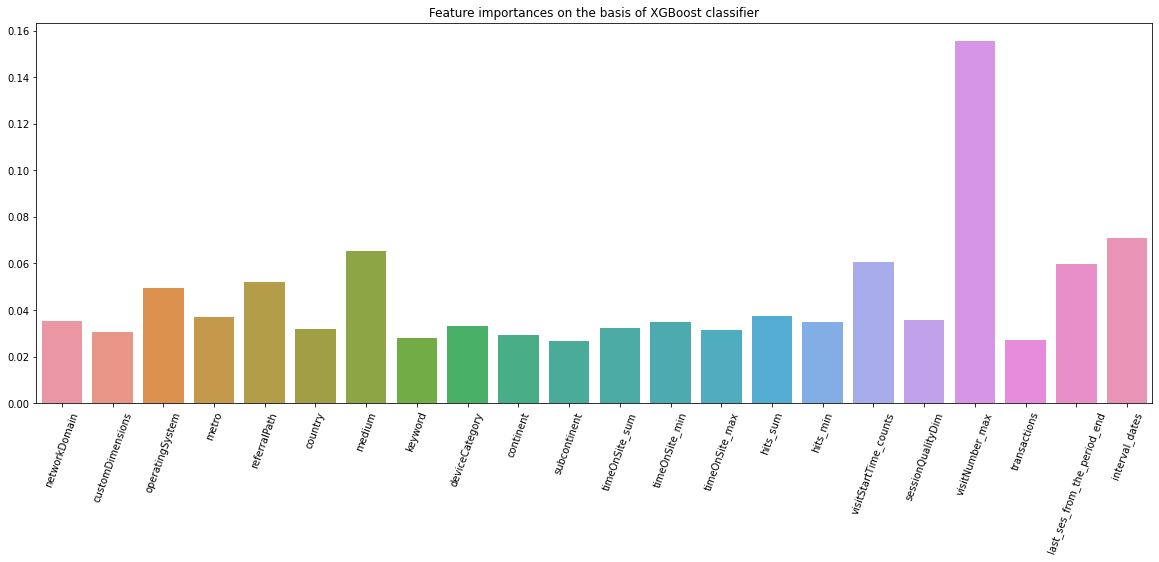

In [20]:
plt.figure(figsize=(20,7))
sn.barplot(x=x_tr.columns,y=feature_imp_clf)
plt.xticks(rotation=70)
plt.title('Feature importances on the basis of XGBoost classifier')
plt.show()

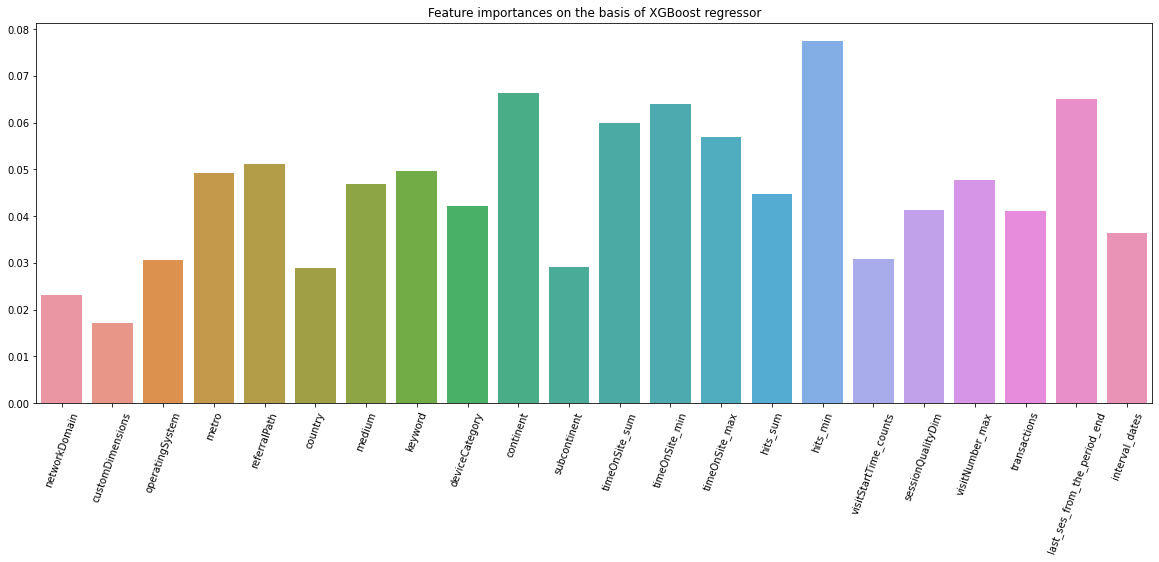

In [21]:
plt.figure(figsize=(20,7))
sn.barplot(x=x_tr.columns,y=feature_imp_reg)
plt.xticks(rotation=70)
plt.title('Feature importances on the basis of XGBoost regressor')
plt.show()

# **Conclusion**

In [22]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Classifier", "Regressor",'Features',"RMSE(On Kaggle)"])
  
# Add rows
myTable.add_row(["XGBoost Classifier", "XGBoost Regressor", "All features", "0.88657"])
myTable.add_row(["XGBoost Classifier", "XGBoost Regressor", "Only non-multicollinear features", "0.88607"])
myTable.add_row(["Random Forest Classifier", "Random Forest Regressor", "All features", "0.88675"])
myTable.add_row(["Logistic Regression", "Linear Regression", "All features", "0.88763"])
myTable.add_row(["LightGBM Classifier", "LightGBM Regressor", "Only non-multicollinear features", "0.88733"])
myTable.add_row(["Neural network classifier", "Neural network regressor", "Only non_multicollinear features", "0.88714"])
  
print(myTable)


+---------------------------+--------------------------+----------------------------------+-----------------+
|         Classifier        |        Regressor         |             Features             | RMSE(On Kaggle) |
+---------------------------+--------------------------+----------------------------------+-----------------+
|     XGBoost Classifier    |    XGBoost Regressor     |           All features           |     0.88657     |
|     XGBoost Classifier    |    XGBoost Regressor     | Only non-multicollinear features |     0.88607     |
|  Random Forest Classifier | Random Forest Regressor  |           All features           |     0.88675     |
|    Logistic Regression    |    Linear Regression     |           All features           |     0.88763     |
|    LightGBM Classifier    |    LightGBM Regressor    | Only non-multicollinear features |     0.88733     |
| Neural network classifier | Neural network regressor | Only non_multicollinear features |     0.88714     |
+---------